# 목표 : EDA를 통해 데이터의 형태, 문장길이, 데이터 수, 결측치 등을 파악하고자 한다.

In [33]:
pip install seaborn

     |████████████████████████████████| 292 kB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 43.1 MB/s eta 0:00:01
     |████████████████████████████████| 930 kB 50.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 64.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [239]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random

# 1 : .arrow : 3900

In [50]:
from datasets import load_from_disk

dataset = load_from_disk("input/data/train_dataset")
test_dataset=load_from_disk("input/data/test_dataset")

In [51]:
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset=test_dataset['validation']

train_df=pd.DataFrame(train_dataset)
valid_df=pd.DataFrame(valid_dataset)
test_df=pd.DataFrame(test_dataset)

#### 데이터의 형태

In [14]:
train_dataset[0]

{'title': '미국 상원',
 'context': '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\\n\\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.\\n\\n미국 상원은 미국 하원과는 다르게 미국 대통령을 수반으로 하는 미국 연방 행정부에 각종 동의를 하는 기관이다. 하원이 세금과 경제에 대한 권한, 대통령을 포함한 대다수의 공무원을 파면할 권한을 갖고 있는 국민을 대표하는 기관인 반면 상원은 미국의 주를 대표한다. 즉 캘리포니아주, 일리노이주 같이 주 정부와 주 의회를 대표하는 기관이다. 그로 인하여 군대의 파병, 관료의 임명에 대한 동의, 외국 조약에 대한 승인 등 신속을 요하는 권한은 모두 상원에게만 있다. 그리고 하원에 대한 견제 역할(하원의 법안을 거부할 권한 등)을 담당한다. 2년의 임기로 인하여 급진적일 수밖에 없는 하원은 지나치게 급진적인 법안을 만들기 쉽다. 대표적인 예로 건강보험 개혁 당시 하원이 미국 연방 행정부에게 퍼블릭 옵션(공공건강보험기관)의 조항이 있는 반면 상원의 경우 하원안이 지나치게 세금이 많이 든다는 이유로 퍼블릭 옵션 조항을 제외하고 비영리건강보험기관이나 보험회사가 담당하도록 한 것이다. 이 경우처럼 상원은 하원이나 내각책임제가 빠지기 쉬운 국가들의 국회처럼 걸핏하면 발생하는 의회의 비정상적인 사태를 방지하는 기관이다. 상원은 급박한 처리사항의 경우가 아니면 법안을 먼저 내는 경우가 드물고 하원이 만든 법안을 수정하여 다시 하원에 되돌려보낸다. 이러한 방식으로 단원제가 빠지기 쉬운 함정을 미리 방지하는 것이다.날짜=2017-02-05',
 'question': '대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?',
 'id': 'mrc-1-000067',
 'answers': {'answer_start'

In [10]:
valid_dataset[0]

{'title': ['전효숙', '스토우빌선'],
 'context': ['순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법시험에 합격하여 판사로 임용되었고 대법원 재판연구관, 수원지법 부장판사, 사법연수원 교수, 특허법원 부장판사 등을 거쳐 능력을 인정받았다. 2003년 최종영 대법원장의 지명으로 헌법재판소 재판관을 역임하였다.\\n\\n경제민주화위원회(위원장 장하성이 소액주주들을 대표해 한보철강 부실대출에 책임이 있는 이철수 전 제일은행장 등 임원 4명을 상대로 제기한 손해배상청구소송에서 서울지방법원 민사합의17부는 1998년 7월 24일에 "한보철강에 부실 대출하여 은행에 막대한 손해를 끼친 점이 인정된다"며 "원고가 배상을 청구한 400억원 전액을 은행에 배상하라"고 하면서 부실 경영인에 대한 최초의 배상 판결을 했다. \\n\\n2004년 10월 신행정수도의건설을위한특별조치법 위헌 확인 소송에서 9인의 재판관 중 유일하게 각하 견해를 내었다. 소수의견에서 전효숙 재판관은 다수견해의 문제점을 지적하면서 관습헌법 법리를 부정하였다. 전효숙 재판관은 서울대학교 근대법학교육 백주년 기념관에서 열린 강연에서, 국회가 고도의 정치적인 사안을 정치로 풀기보다는 헌법재판소에 무조건 맡겨서 해결하려는 자세는 헌법재판소에게 부담스럽다며 소회를 밝힌 바 있다.',
  '요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & 니피싱 철도의 설립 인가가 떨어졌을 때였다. 스카버러 남쪽과 코보콘크 마을을 잇는 철도 노선 공사가 시작되었고 1871년 6월에 억스브릿지까지 철도가 완공되었다. 이 노선은 이후 1871년 11월에 캐닝턴까지 연장되었고 1872년 11월에 코보콘크까지 완공되었다. \\n\\n이 노선의 철로 궤간은 1067mm로 협궤 노선이였다. 목재와 장작 수요가 선로 용량이 넘칠 정도로 많았지만 1870년대에 다른 철도와 마찬가지로 경제적 난황을 이기 못해 수익이 줄어들었다. 투자자들은 수익이 줄어든 이유

In [23]:
test_dataset[0]

{'question': "유령'은 어느 행성에서 지구로 왔는가?", 'id': 'mrc-1-000653'}

In [163]:
type(test_dataset)

datasets.arrow_dataset.Dataset

In [359]:
train_df=pd.DataFrame(train_dataset)
train_df['con_len'] = train_df['context'].apply(lambda x: len(x))
train_df['qu_len'] = train_df['question'].apply(lambda x: len(x))
train_df['ans_len']=[len(train_df['answers'][i]['text'][0]) for i in range(len(train_df))]

valid_df=pd.DataFrame(valid_dataset)
valid_df['con_len'] = valid_df['context'].apply(lambda x: len(x))
valid_df['qu_len'] = valid_df['question'].apply(lambda x: len(x))
valid_df['ans_len']=[len(valid_df['answers'][i]['text'][0]) for i in range(len(valid_df))]

test_df=pd.DataFrame(test_dataset)
test_df['qu_len'] = test_df['question'].apply(lambda x: len(x))

In [360]:
train_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862,32,2
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,621,22,8
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,850,30,2
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,727,39,2
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,609,26,2


In [361]:
valid_df.head()

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146,625,30,4
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106,964,36,5
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180,611,31,3
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141,1391,24,3
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184,608,34,6


In [186]:
test_df.head()

,question,id,qu_len
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653,21
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113,31
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191,39
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951,36
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272,26


# 데이터 개수

![img](https://user-images.githubusercontent.com/46811558/165691844-220b4817-b24f-4c94-9587-84a2801a9f56.png)

In [189]:
print(f"Train : {len(train_df)}")
print(f"Valid : {len(valid_df)}")
print(f"Test : {len(test_df)}")

Train : 3952
Valid : 240
Test : 600


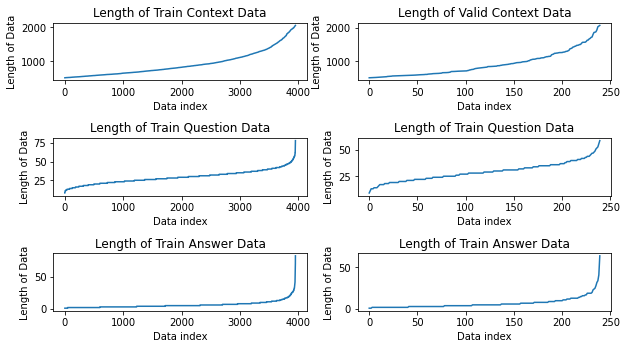

In [366]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.plot(sorted(train_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Context Data")

plt.subplot(3,2,2)
plt.plot(sorted(valid_df["con_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Valid Context Data")

plt.subplot(3,2,3)
plt.plot(sorted(train_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Question Data")

plt.subplot(3,2,4)
plt.plot(sorted(valid_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Question Data")

plt.subplot(3,2,5)
plt.plot(sorted(train_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Answer Data")

plt.subplot(3,2,6)
plt.plot(sorted(valid_df["ans_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Train Answer Data")

plt.show()

#### 히스토그램으로 분포 확인

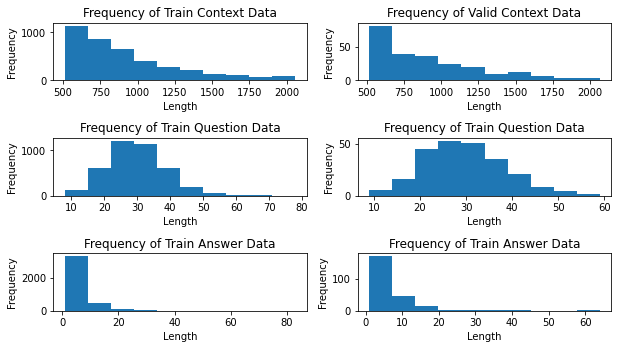

In [456]:
plt.figure(figsize=(10, 5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=1)

plt.subplot(3,2,1)
plt.hist(sorted(train_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Context Data")

plt.subplot(3,2,2)
plt.hist(sorted(valid_df["con_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Valid Context Data")

plt.subplot(3,2,3)
plt.hist(sorted(train_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data")

plt.subplot(3,2,4)
plt.hist(sorted(valid_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Question Data")

plt.subplot(3,2,5)
plt.hist(sorted(train_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Answer Data")

plt.subplot(3,2,6)
plt.hist(sorted(valid_df["ans_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Train Answer Data")

plt.show()

In [367]:
train_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,3952.000000,3952.000000,3952.000000
mean,920.220648,29.322368,6.275051
std,356.500514,8.727421,5.346842
min,512.000000,8.000000,1.000000
25%,645.000000,23.000000,3.000000
50%,819.000000,29.000000,5.000000
75%,1099.250000,35.000000,8.000000
max,2059.000000,78.000000,83.000000


In [368]:
valid_df[["con_len","qu_len","ans_len"]].describe()

,con_len,qu_len,ans_len
count,240.000000,240.000000,240.000000
mean,916.725000,29.195833,6.912500
std,360.032122,8.728301,6.858755
min,517.000000,9.000000,1.000000
25%,616.750000,23.000000,3.000000
50%,820.500000,29.000000,5.000000
75%,1107.250000,35.000000,8.000000
max,2064.000000,59.000000,64.000000


## train,valid는 거의 같음

In [207]:
test_df.describe()

,qu_len
count,600.000000
mean,29.555000
std,8.962376
min,8.000000
25%,23.000000
50%,29.000000
75%,35.000000
max,62.000000


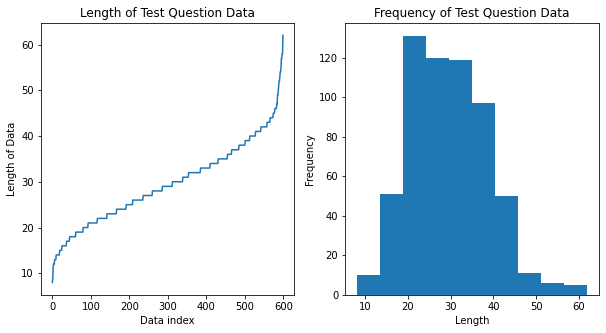

In [455]:
plt.figure(figsize=(10, 5))

plt.subplot(1,2,1)
plt.plot(sorted(test_df["qu_len"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Test Question Data")

plt.subplot(1,2,2)
plt.hist(sorted(test_df["qu_len"]))
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.title("Frequency of Test Question Data")

plt.show()

## test_data의 question도 train,valid와 길이 거의 유사

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6c8af0c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6c8b002b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6c8af0940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6c8b00790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6c8b00a60>],
 'means': []}

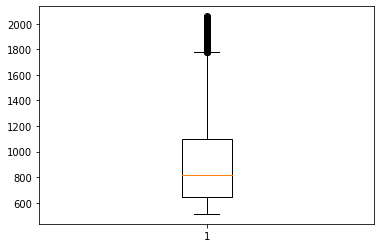

In [45]:
plt.boxplot(sorted(train_context_length))

#### 결측치 & 중복

In [393]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3952 entries, 0 to 3951
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              3952 non-null   object
 1   context            3952 non-null   object
 2   question           3952 non-null   object
 3   id                 3952 non-null   object
 4   answers            3952 non-null   object
 5   document_id        3952 non-null   int64 
 6   __index_level_0__  3952 non-null   int64 
 7   con_len            3952 non-null   int64 
 8   qu_len             3952 non-null   int64 
 9   ans_len            3952 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 308.9+ KB


In [394]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              240 non-null    object
 1   context            240 non-null    object
 2   question           240 non-null    object
 3   id                 240 non-null    object
 4   answers            240 non-null    object
 5   document_id        240 non-null    int64 
 6   __index_level_0__  240 non-null    int64 
 7   con_len            240 non-null    int64 
 8   qu_len             240 non-null    int64 
 9   ans_len            240 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 18.9+ KB


In [395]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  600 non-null    object
 1   id        600 non-null    object
 2   qu_len    600 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [398]:
print(train_df['context'].nunique())
print(train_df['question'].nunique())
print(valid_df['context'].nunique())
print(valid_df['question'].nunique())
print(test_df['question'].nunique())

3340
3952
235
240
600


In [399]:
train_df[train_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
2181,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",시간이동' 에피소드의 다음 에피소드의 제목은 무엇인가?,mrc-1-000565,"{'answer_start': [234], 'text': ['거짓말']}",25858,368,650,30,3
2164,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",ABC에서 방영되는 '시간이동'의 장르는?,mrc-0-004810,"{'answer_start': [21], 'text': ['텔레비전 드라마']}",25858,3135,650,23,8
3408,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,사쿠라가 성장할 때 스피넬 선을 만든 이유는?,mrc-0-005352,"{'answer_start': [356], 'text': ['자신에게서 크로우 리드...",49888,3487,870,25,23
1350,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,에리오르에게는 효력이 없는 마법은?,mrc-0-005385,"{'answer_start': [120], 'text': ['달 속성의 마법']}",49888,3511,870,19,8
2353,하인리히 4세,1090년 교황 우르바노 2세의 주선으로 43세의 토스카나 여후작 마틸다가 결혼을 ...,마틸다와 결혼한 인물은?,mrc-0-002459,"{'answer_start': [81], 'text': ['벨프 5세']}",11195,1608,1214,13,5
...,...,...,...,...,...,...,...,...,...,...
1946,탐무즈,활달한 대지의 여신 이슈타르-인니나(이하 이슈타르)가 식물과 생명의 성장의 신인 자...,무엇이 이슈타르가 사랑한 대상을 죽음에 이르게 했나?,mrc-0-002377,"{'answer_start': [249], 'text': ['멧돼지']}",13012,1559,612,29,3
2743,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...",위표가 항우 쪽으로 돌아서는 계기가 된 발언을 한 인물은 누구인가?,mrc-1-000310,"{'answer_start': [252], 'text': ['허부']}",34137,204,990,37,2
2684,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...","본래, 한왕 측에서 팽성 대전에 참전했으나 한을 배신하고 항우의 편으로 넘어간 인물은?",mrc-0-002695,"{'answer_start': [278], 'text': ['위표']}",34137,1768,990,48,2
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",힐이 사관학교 병원에서 임질의 치료를 받은 때는 몇 월이었나요?,mrc-0-001005,"{'answer_start': [216], 'text': ['9월']}",9473,661,1082,35,2


In [400]:
valid_df[valid_df[['context']].duplicated(keep=False)].sort_values('context')

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
74,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀의 여자 친구의 종교는?,mrc-0-003677,"{'answer_start': [215], 'text': ['퀘이커 교']}",5265,2418,667,15,5
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,mrc-0-001162,"{'answer_start': [215], 'text': ['퀘이커 교도였던 앨리스...",5265,760,667,33,20
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,mrc-0-002076,"{'answer_start': [192], 'text': ['코칭 스티치']}",19975,1366,597,32,6
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,mrc-1-001132,"{'answer_start': [101], 'text': ['점수']}",19975,744,597,38,2
129,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송나라가 돈을 지불하여 피하고자 했던 것은?,mrc-0-004495,"{'answer_start': [251], 'text': ['전쟁']}",7305,2932,1567,24,2
205,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",송이 금에게 바친 공물은 은 30만량과 비단 몇 필인가?,mrc-0-003437,"{'answer_start': [163], 'text': ['10만필']}",7305,2257,1567,31,4
162,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,"입자들의 속도가 줄 때, 방출되는 에너지가 만들어내는 것은?",mrc-0-003637,"{'answer_start': [435], 'text': ['충격파']}",7635,2390,712,33,3
189,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,태양풍을 멈추게 하는 것과 말단 충격의 틈을 무엇이라 부르는가?,mrc-1-000714,"{'answer_start': [609], 'text': ['헬리오시스']}",7635,458,712,35,5
73,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,돌을 캐고 난 빈 채석장은 어떠한 용도로 이용하였나?,mrc-0-004899,"{'answer_start': [435], 'text': ['저수지']}",12190,3183,897,29,3
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,897,26,13


#### 이번 태스크에서는 중복을 제거하는게 의미가 없을 듯
- 중복을 제거해서 실험을 하더라도, arrow파일을 수정할 수 있어야..
- test에서의 question이 중복되는 document에 있을수도 있기에, 함부로 수정 불가

---

# 2 : wiki.json

In [57]:
import json
import pandas as pd
from pandas import json_normalize

file_path = "input/data/wikipedia_documents.json"

with open(file_path, "r") as json_file:
    json_data = json.load(json_file)

#### 데이터의 형태

In [84]:
json_data["0"]

{'text': '이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.\n\n이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.\n\n# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.\n# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.\n\n두 목록은 모두 가나다 순이다.\n\n일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.',
 'corpus_source': '위키피디아',
 'url': 'TODO',
 'domain': None,
 'title': '나라 목록',
 'author': None,
 'html': None,
 'document_id': 0}

In [90]:
for key,value in json_data["0"].items():
    print(f"{key} : {value}\n")

text : 이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개요 형태로 나열하고 있다.

이 목록은 명료화를 위해 두 부분으로 나뉘어 있다.

# 첫 번째 부분은 바티칸 시국과 팔레스타인을 포함하여 유엔 등 국제 기구에 가입되어 국제적인 승인을 널리 받았다고 여기는 195개 나라를 나열하고 있다.
# 두 번째 부분은 일부 지역의 주권을 사실상 (데 팍토) 행사하고 있지만, 아직 국제적인 승인을 널리 받지 않았다고 여기는 11개 나라를 나열하고 있다.

두 목록은 모두 가나다 순이다.

일부 국가의 경우 국가로서의 자격에 논쟁의 여부가 있으며, 이 때문에 이러한 목록을 엮는 것은 매우 어렵고 논란이 생길 수 있는 과정이다. 이 목록을 구성하고 있는 국가를 선정하는 기준에 대한 정보는 "포함 기준" 단락을 통해 설명하였다. 나라에 대한 일반적인 정보는 "국가" 문서에서 설명하고 있다.

corpus_source : 위키피디아

url : TODO

domain : None

title : 나라 목록

author : None

html : None

document_id : 0



#### 데이터의 수 & 문장 길이

In [147]:
df_wiki=pd.read_json("input/data/wikipedia_documents.json").transpose()
df_wiki["text_length"]=[len(wiki["text"]) for wiki in json_data.values()]

In [149]:
df_wiki.head(5)

,text,corpus_source,url,domain,title,author,html,document_id,text_length
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0,454
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1,2276
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2,5068
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3,601
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4,465


In [150]:
df_wiki.describe()

,text_length
count,60613.000000
mean,755.565044
std,762.962671
min,184.000000
25%,414.000000
50%,577.000000
75%,857.000000
max,46099.000000


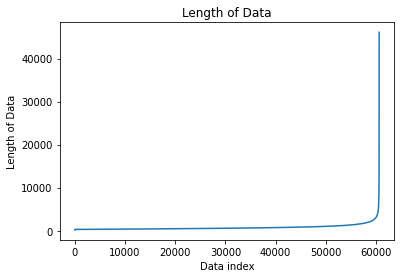

In [151]:
plt.plot(sorted(df_wiki["text_length"]))
plt.xlabel("Data index")
plt.ylabel("Length of Data")
plt.title("Length of Data")
plt.show()

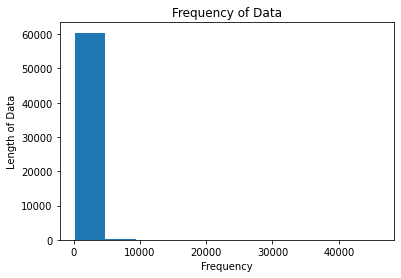

In [458]:
plt.hist(sorted(df_wiki["text_length"]))
plt.xlabel("Frequency")
plt.ylabel("Length of Data")
plt.title("Frequency of Data")
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd6a5693430>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd6a5693f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd6a56930d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd6a5796af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd6a578b0d0>],
 'means': []}

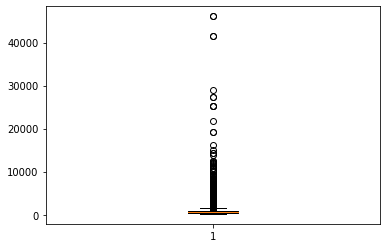

In [152]:
plt.boxplot(sorted(df_wiki["text_length"]))

#### 중복 & 결측치

In [153]:
df_wiki.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60613 entries, 0 to 60612
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   text           60613 non-null  object
 1   corpus_source  60613 non-null  object
 2   url            4554 non-null   object
 3   domain         0 non-null      object
 4   title          60613 non-null  object
 5   author         0 non-null      object
 6   html           0 non-null      object
 7   document_id    60613 non-null  object
 8   text_length    60613 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 7.1+ MB


In [155]:
df_wiki.nunique()

text             56737
corpus_source        1
url                  1
domain               0
title            31755
author               0
html                 0
document_id      60613
text_length       2912
dtype: int64

In [158]:
sum(df_wiki["text"].duplicated())

3876

In [161]:
df_wiki[df_wiki[['text']].duplicated(keep=False)].sort_values('text')

,text,corpus_source,url,domain,title,author,html,document_id,text_length
3859,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,TODO,None,로봇 배제 표준,None,None,3859,429
8413,"""Robots.txt""는 이 문서를 가리킵니다. 위키백과의 Robots.txt의 파...",위키피디아,None,None,로봇 배제 표준,None,None,8413,429
6873,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,None,None,삼성SDS,None,None,6873,728
2319,"""들어오지 못하게, 나가지 못하게, 나가도 쓰지 못하게”라는 삼성SDS 고유의 보안...",위키피디아,TODO,None,삼성SDS,None,None,2319,728
3744,"""아미타불""이라는 낱말은 무량광(無量光: 헤아릴 수 없는 광명을 가진 것)의 뜻인 ...",위키피디아,TODO,None,아미타불,None,None,3744,414
...,...,...,...,...,...,...,...,...,...
6497,"힌디어(हिन्दी, Hindi)는 인도유럽어족의 인도이란어파에 속하는 언어로, 영...",위키피디아,None,None,힌디어,None,None,6497,314
7107,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,None,None,질량-에너지 등가,None,None,7107,609
2553,"힘이 물체의 운동 방향으로 작용하면, 물체의 운동량이 증가하고 힘이 일을 하므로 에...",위키피디아,TODO,None,질량-에너지 등가,None,None,2553,609
9096,"치 셰미니 례예 낫재라.\n\n○ 子思子曰, 天命之謂性, 率性之謂道, 修道...",위키피디아,None,None,소학언해,None,None,9096,5516


In [288]:
df_wiki[df_wiki[['text','url']].duplicated(keep='first')].sort_values('text')

,text,corpus_source,url,domain,title,author,html,document_id,text_length
49841,"10대 닥터\n \n*TARDISODE 8\n*""The beast and his a...",위키피디아,None,None,The Satan Pit,None,None,49841,319
60263,19세기 말부터 러시아의 진보적 귀족과 러시아 농촌 내 농민에게서 자생적으로 발생한...,위키피디아,None,None,노농동맹,None,None,60263,765
56384,2000년부터 김정일은 독립채산제로 인한 자체 수익 사업을 권장하며 방위산업이든 일...,위키피디아,None,None,89호집적회로공장,None,None,56384,599
56109,2000년부터 김정일은 독립채산제로 인한 자체 수익 사업을 권장하며 방위산업이든 일...,위키피디아,None,None,평양집적회로시험공장,None,None,56109,599
49062,2018년 동계 올림픽 크로스컨트리 예선\n올림픽 대회에 앞서 선수 선발전이 진행됐...,위키피디아,None,None,2018년 동계 올림픽 크로스컨트리 여자 10km 프리,None,None,49062,524
...,...,...,...,...,...,...,...,...,...
54994,"팀들은 승점 순으로 정렬된다.(승리시 3점, 무승부시 1점, 패배시 0점), 승점 ...",위키피디아,None,None,2019-20년 UEFA 유로파리그 조별 리그,None,None,54994,354
42937,파일:Pierre Trudeau (1975).jpg|캐나다 캐나다<br />피에르 ...,위키피디아,None,None,제4회 G7 정상회담,None,None,42937,480
5870,한단이 함락되고 공자 가가 대군으로 쫓겨들어온 후에 얼마 지나지 않아 진나라군은 역...,위키피디아,None,None,진나라,None,None,5870,1602
1316,한단이 함락되고 공자 가가 대군으로 쫓겨들어온 후에 얼마 지나지 않아 진나라군은 역...,위키피디아,TODO,None,진나라,None,None,1316,1602


- 7677/2= 3838.5는 3876과다름 -> 3개이상인 친구가 있음 -> 중복은 url이 다르거나(None vs TODO), title이 다름 + document_id도
- 문장의 길이가 같기에 더 파고들지 않음

---

# ETC
## 1 : __index_level_0__ <-????????????????

In [228]:
train_df['__index_level_0__']

0         42
1       2873
2        230
3        992
4        548
        ... 
3947    3445
3948     450
3949    2252
3950    2595
3951    2354
Name: __index_level_0__, Length: 3952, dtype: int64

In [229]:
train_df['__index_level_0__'].describe()

count    3952.000000
mean     1496.027328
std      1060.480948
min         0.000000
25%       587.000000
50%      1189.500000
75%      2416.250000
max      3593.000000
Name: __index_level_0__, dtype: float64

In [231]:
train_df['__index_level_0__'].nunique()

3120

## 2 : arrow vs wiki

In [250]:
train_df[train_df["document_id"]==18293]

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,862,32


In [252]:
df_wiki[df_wiki["document_id"]==18293]

,text,corpus_source,url,domain,title,author,html,document_id,text_length
18293,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,위키피디아,None,None,미국 상원,None,None,18293,862


In [284]:
list(df_wiki[df_wiki["document_id"]==18293]['text'])==list(train_df[train_df["document_id"]==18293]['context'])

True

In [285]:
train_list=list(train_df['context'])
wiki_list=list(df_wiki['text'])

In [286]:
cnt=0
for tl in train_list:
    if tl in wiki_list:
        cnt+=1
print(cnt)

3952


### --> subset은 맞다. 하지만, 문장 선정기준은..?

### 가설 1 : 이상한 문장 없애기

In [433]:
list(df_wiki[df_wiki['document_id']==9096]['text'])

['\ue1a7\ue46c치\ue566 셰미니 \uf341례예 \uf537낫재라.\n\n○ 子思子曰, 天命之謂性, 率性之謂道, 修道之謂敎. 則天明, 遵聖法, 述此篇. 俾爲師者, 知所以敎. 而弟子知所以學\n\n\uf1fc\ue97d\uf1fc(子思子)[\uf1fc\ue97d(子思)\ue285 \uf212오 일호\ue563 급(伋)이니 공\uf1fc (孔子)ㅅ 손\uf212라 아랟 자(子) ㄷ \uf1fc\ue285 존\uf337\uf537\ue285 말이라]ㅣ \ue1a7 \ue46c샤\ue3a8 하\ue288히 \ue514(命)\uf537신 거\ue982 닐온 셩(性)이오 셩(性)을 조 차\ue566 닐온 도(道)ㅣ라 \uf537시니 하\ue28c \ue64f근 거슬 법바\ue38a며 \ue904인 ㅅ 법(法)을 조차 이 편(篇)을 \ue588가라 \uf550여곰 스\ue95b되니로\ue73b \ue1a7\ue46c칠 바\ue470 알에\uf537며 뎨\uf1fc로\ue73b \ue668홀 바\ue470 알에\uf537노라.\n\n○ 列女傳曰, 古者, 婦人妊子, 寢不側. 坐不邊. 立不蹕. 不食 邪味. 割不正不食. 席不正不坐. 目不視邪色. 耳不聽淫聲. 夜 則令瞽誦詩. 道正事. 如此則生子, 形容端正. 才過人矣.\n\n렬녀뎐(列女傳)[녜 겨지븨 \ue97d실 긔록\uf53a \uf354이라]에 \ue1a7로\ue3a8 녜 겨지비 \uf1fc식 여실졔 잘제 기우리디 아니\uf537며 안조매 \ue1ab지디 아니\uf537며 셔매 \uf53a 발츼 드\ue3a8디 아니\uf537며, 샤특\uf53a 마\ue982 먹디 아니\uf537며 버힌 거시 \uf199(正)티 아니커든 안\ueaed 아니\uf537며, 누네 샤특\uf53a 비츨 보디 아니\uf537며 귀예 음란\uf53a 소\ue487\ue470 듣디 아니\uf537 고 바미어든 쇼\ue10e으로 \uf550여곰 모시\ue470 외오며 \uf199(正)\uf53a 이\ue470 니\ue46c더니라. 이러\uf43

### 가설 2 : 문장길이를 고려하여 정규분포 ?

![1111](https://user-images.githubusercontent.com/46811558/165876692-2950dcd4-8fab-448c-8b89-229b28242a0d.png)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fd69ef000a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd69ef00640>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd69eef5d90>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd69ef00ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd69ef00d90>],
 'means': []}

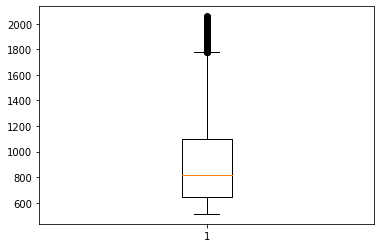

In [293]:
plt.boxplot(train_df['con_len'])

In [308]:
print(list(df_wiki[df_wiki['document_id']==49108]['text']))
print(list(df_wiki[df_wiki['document_id']==24161]['text']))
print(list(df_wiki[df_wiki['document_id']==12592]['text']))
print(list(df_wiki[df_wiki['document_id']==30916]['text']))

['기드온이 그에게 대답하되 오 나의 주여 여호와께서 우리와 함께 계시면 어찌하여 이 모든 일이 우리에게 일어났나이까 또 우리 조상들이 일찍이 우리에게 이르기를 여호와께서 우리를 애굽에서 올라오게 하신 것이 아니냐 한 그 모든 이적이 어디 있나이까 이제 여호와께서 우리를 버리사 미디안의 손에 우리를 넘겨 주셨나이다 하니\n(6:14)']
['사시가 있는 환자를 관찰할 때, 눈이 나란히 있지 않은 모습을 쉽게 인지할 수 있다. 사시의 정도가 높은 환자의 경우 매우 쉽게 확인이 가능하다. 그러나 정도가 약한 환자는 관찰이 어려울 수 있다. 어떠한 경우이든 안과 전문의는 사시 여부를 진단하기 위해 커버 테스팅과 같은 다양한 테스트를 수행할 수 있다.\n\n사시는 다운 증후군, 로이 디에츠 증후군, 뇌성 마비, 에드워드 증후군에서 나타날 수 있다.\n\n사시의 증상으로는 다시증, 안정 피로를 포함한다. 다시증을 피하기 위해 뇌는 한쪽 눈을 무시함으로써 적응하려는 경향을 보일 수 있다.']
['스타리그를 우승한 서지훈은 1번 시드를 받으며 마이큐브 스타리그를 맞이한다. 1승 2패로 재경기로 몰리며 온게임넷에서 지속되었던 우승자 징크스의 우려를 받았지만, 재경기 끝에 8강 진출에 성공한다.\n\n8강에서는, 그토록 덜미를 잡아왔던 박경락에게는 승리하지만, 영웅 박정석과 전대회 결승 상대였던 홍진호에게 패배하며 4강 진출에 실패한다. 8강에는 일단 진출했으니 우승자 징크스는 깨진 것이 아닌가 하는 견해도 있었지만, 이후 듀얼토너먼트에서 성학승에게만 2패를 안으며 챌린지리그로 떨어지면서 결과적으로는 우승자 징크스의 희생자가 되었다.']
['잔물땡땡이는 물땡땡이과에 속하는 수생 곤충이다.  몸길이는 15~20mm이고, 광택이 있는 흑색이며 긴 타원형이다. 논, 웅덩이, 연못, 인공호 등 정수역과 평지하천, 강 등 유수역에 서식한다. 유속이 완만하거나 정체되는 수변부의 식생이 풍부한 곳을 선호한다. 성충은 연중 볼 수 있는데 물속의 풀을 먹고, 마름이나 연의 잎 아랫면에 덩어리

In [316]:
print(list(train_df[train_df['document_id']==56191]['context']))
print(list(train_df[train_df['document_id']==21025]['context']))

['마지막 유격전은 적의 수송대를 공격하는 작전이었다. 생도들은 정보원으로부터 북한군의 UN군의 서울 공격에 대비하여 마을 사람들을 화물차에 싣고 북으로 올라갈 것이라는 소식을 듣게 되고, 구출 작전을 구상하게 된다. 당시 유격대가 보유한 장비는 개인별 소총 1자루와 실탄 10여 발이 전부였지만, 국가와 국민을 지키겠다는 신념 하나로 전투에 임하게 된다. 전투는 야간에 시작되었다. 생도들은 적이 통과할 내곡리 마을 주변에 매복하고 적군을 기다렸다. 23시경 적군의 수송대가 내곡리 마을을 통과하려던 찰나, 생도들은 소총을 쏘며 습격을 감행하였다. 이때 적군의 혼란을 틈타 조영달 생도가 주민들에게 대피하라고 외친 덕에 많은 주민들이 구출될 수 있었다. 가지고 있던 장비를 모두 소모한 생도들은 불암산의 기지로 복귀하고자 하였으나 적의 흉탄에 남은 생도 모두가 장렬히 전사하였다. 이로써 국가와 국민을 위해 수도 서울과 육사를 방어하고자 항쟁한 생도들의 찬란한 유격전도 막을 내렸다. 때는 서울 수복 1주일 전이였다.', '마지막 유격전은 적의 수송대를 공격하는 작전이었다. 생도들은 정보원으로부터 북한군의 UN군의 서울 공격에 대비하여 마을 사람들을 화물차에 싣고 북으로 올라갈 것이라는 소식을 듣게 되고, 구출 작전을 구상하게 된다. 당시 유격대가 보유한 장비는 개인별 소총 1자루와 실탄 10여 발이 전부였지만, 국가와 국민을 지키겠다는 신념 하나로 전투에 임하게 된다. 전투는 야간에 시작되었다. 생도들은 적이 통과할 내곡리 마을 주변에 매복하고 적군을 기다렸다. 23시경 적군의 수송대가 내곡리 마을을 통과하려던 찰나, 생도들은 소총을 쏘며 습격을 감행하였다. 이때 적군의 혼란을 틈타 조영달 생도가 주민들에게 대피하라고 외친 덕에 많은 주민들이 구출될 수 있었다. 가지고 있던 장비를 모두 소모한 생도들은 불암산의 기지로 복귀하고자 하였으나 적의 흉탄에 남은 생도 모두가 장렬히 전사하였다. 이로써 국가와 국민을 위해 수도 서울과 육사를 방어하고자 항쟁한 생도들의 찬란한 유

## 3 : answer의 개수

### 가설(EM 기준) : **또한 답이 하나가 아닐 수 있는데, 이런 경우는 하나라도 일치하면 정답으로 간주합니다.**

In [363]:
train_ans=[]
for i in range(len(train_df)):
    train_ans.append(len(dict(train_df['answers'])[i]['text']))

valid_ans=[]
for i in range(len(valid_df)):
    valid_ans.append(len(dict(valid_df['answers'])[i]['text']))
    
print(max(train_ans)==min(train_ans))
print(max(valid_ans)==min(valid_ans))

True
True


In [369]:
train_df[train_df['document_id']==5307]

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,"{'answer_start': [1122], 'text': ['“나는 국경일에 일장...",5307,1833,1633,36,83
3149,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",3.1운동이 평화적 선언서 낭독으로 한국의 독립을 알리자는 의도가 감정적 시위로 변...,mrc-0-003277,"{'answer_start': [1296], 'text': ['권동진']}",5307,2153,1633,58,3


- answer list에 답이 두개인 것은 없음. test는 안봐서 모르지만, EM에 많은 것을 넣을려는 수작 통하지 않음.(Ex : 대통령이라면 인물 태깅되는 Entity들 전부삽입)
- 중복 context 중에서, ans의 최대길이와 최소길이가 같은 문장에서 나옴 -> **질문내용을 구분할 수 있을까?**

In [381]:
train_df.sort_values('ans_len',ascending=False)

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,"{'answer_start': [1122], 'text': ['“나는 국경일에 일장...",5307,1833,1633,36,83
2656,번역,다른 언어로 노래하기 위한 목적으로 노랫말을 번역하는 것을 노래 번역으로 부르기도 ...,노랫말의 번역이 대구 시구 번역보다 훨씬 제약이 많은 이유는?,mrc-0-003084,"{'answer_start': [330], 'text': ['형태에 있어 거의 혹은...",5664,2032,1302,34,71
520,판스워스 교수,"판스워스 교수는 배달원의 안전에 대해 별로 중요하게 생각하지 않으며, 첫 번째 에피...",판스워스 교수가 이전 배달원에 대해 한 대사는?,mrc-0-000147,"{'answer_start': [87], 'text': ['""오 그 불쌍한 사람들....",25654,90,657,26,62
2923,자캐오,"영남신학대학교 정경호 교수에 따르면, 세관장 자캐오는 그 당시 가장 멸시당하던 세리...",자캐오가 회개의 결단을 표현한 말은?,mrc-0-001939,"{'answer_start': [816], 'text': ['""소유의 절반을 가난한...",37329,1278,1176,20,60
3757,192고지 사건,일등병 로버트 M 스토비는 분대에 함께 있었지만 이 일에 가담하지는 않았다. 작전을...,토머스는 어떤 사건으로 인해 1년간의 보호 관찰을 받았나?,mrc-0-005409,"{'answer_start': [465], 'text': ['USS 사라토가 호에서...",43204,3528,642,32,52
...,...,...,...,...,...,...,...,...,...,...
1155,성장드라마 반올림,옥림은 어렸을 때부터 친하게 지낸 욱에게 좋아하는 마음이 있었지만 단짝인 정민과 사...,반 아이들에게 세리가 누구를 좋아한다고 들통났나요?,mrc-0-001867,"{'answer_start': [1038], 'text': ['욱']}",8950,1226,1246,28,1
1401,이오 (위성),"이오에 대한 탐사\n 이오의 발견을 최초로 공표한 사람은 갈릴레오 갈릴레이로, 16...",갈릴레오가 발견한 다른 위성과 달리 이오에게만 존재하지 않는 것은?,mrc-0-000216,"{'answer_start': [1336], 'text': ['물']}",8264,141,1494,37,1
660,지랄발광 17세,네이딘은 어려서부터 시니컬하고 삐딱한 성격의 소유자였다. 친구는 비교적 차분한 성격...,네이든이 몰래 좋아하고 있었던 인물은 누구인가요?,mrc-0-003969,"{'answer_start': [221], 'text': ['닉']}",46378,2605,1722,27,1
2822,안양 중초사지 당간지주,절에 행사가 있을 때 절 입구에 당(幢)이라는 깃발을 달아두는데 이 깃발을 달아두는...,당간지주를 볼 수 있는 시설은?,mrc-1-001221,"{'answer_start': [0], 'text': ['절']}",33298,797,727,17,1


In [390]:
list(train_df[train_df['document_id']==5307]['answers'])[0]['text']

['“나는 국경일에 일장기를 게양하는 것을 반대하지 않는다. 왜냐하면 우리가 일본의 통치하에 있는 한 우리는 그 통치의 명령에 복종해야 하기 때문이다.”']

![2222](https://user-images.githubusercontent.com/46811558/165873021-fd195e3e-89fb-41cb-9700-77fc1393a1c3.png)

In [429]:
train_df.sort_values('ans_len',ascending=False).head(10)

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
996,윤치호,"3·1 운동\n1919년 3월 3·1 운동 당시, 독립운동가들로부터 국민대표로 서명...",윤치호가 일부 독립운동 지도자들로부터 비난 받았던 일기의 내용은?,mrc-0-002792,"{'answer_start': [1122], 'text': ['“나는 국경일에 일장...",5307,1833,1633,36,83
2656,번역,다른 언어로 노래하기 위한 목적으로 노랫말을 번역하는 것을 노래 번역으로 부르기도 ...,노랫말의 번역이 대구 시구 번역보다 훨씬 제약이 많은 이유는?,mrc-0-003084,"{'answer_start': [330], 'text': ['형태에 있어 거의 혹은...",5664,2032,1302,34,71
520,판스워스 교수,"판스워스 교수는 배달원의 안전에 대해 별로 중요하게 생각하지 않으며, 첫 번째 에피...",판스워스 교수가 이전 배달원에 대해 한 대사는?,mrc-0-000147,"{'answer_start': [87], 'text': ['""오 그 불쌍한 사람들....",25654,90,657,26,62
2923,자캐오,"영남신학대학교 정경호 교수에 따르면, 세관장 자캐오는 그 당시 가장 멸시당하던 세리...",자캐오가 회개의 결단을 표현한 말은?,mrc-0-001939,"{'answer_start': [816], 'text': ['""소유의 절반을 가난한...",37329,1278,1176,20,60
3757,192고지 사건,일등병 로버트 M 스토비는 분대에 함께 있었지만 이 일에 가담하지는 않았다. 작전을...,토머스는 어떤 사건으로 인해 1년간의 보호 관찰을 받았나?,mrc-0-005409,"{'answer_start': [465], 'text': ['USS 사라토가 호에서...",43204,3528,642,32,52
582,소크라테스 이전 철학자,"소크라테스 이전 철학자(독일어: Vorsokratiker, 영어: Presocrat...",영어로 Presocratics란 뜻을 가진 낱말의 기원은?,mrc-1-000394,"{'answer_start': [111], 'text': ['독일의 고전 문헌학자 ...",4926,255,950,32,47
2381,타지마할,타지마할의 내부 장식은 전통적인 무굴 양식과는 매우 큰 차이를 보인다. 거의 대부분...,샤 자한의 관이 타지마할 전체에서 유일하게 대칭 구조를 띠지 않는다고 추측되는 이유는?,mrc-0-002807,"{'answer_start': [976], 'text': ['샤 자한이 이 무덤을 ...",16092,1844,1136,48,46
3359,플랫 파일 데이터베이스,컴퓨팅 기기는 처음에는 단순한 데이터베이스를 구현하기 위해 쓰였다. 당시 허먼 홀러...,개인 사용자가 각자 사용할 데이터베이스를 디자인하는 것을 쉽게 해준 프로그램은?,mrc-0-001409,"{'answer_start': [748], 'text': ['매킨토시와 도스 상에서...",11097,924,964,44,42
1073,윤치호,그는 곧 밴더빌트 대학교 신학부에 입학하였다. 밴더빌트 대학교 재학 중에 그는 감옥...,윤치호가 조지아주에서 재입학한 학교는?,mrc-0-003659,"{'answer_start': [1206], 'text': ['에모리 대학(Oxfo...",5281,2404,1410,21,42
2963,자본국가,"자본국가(資本國家, capitalist state)란 자본주의 사회경제체제에 따라 ...",마르크수 주의를 주장하는 사람들이 자본국가를 어떻게 지칭하는가?,mrc-0-004008,"{'answer_start': [755], 'text': ['“부르주아 독재(Dic...",50761,2626,922,35,42


### --> 답변 자체가 단어로 나오지않고 문장으로 나오는 것들을 제거한다면..? ex : 사건,말,대사 등등
- 하지만.. 프로그램,학교 명의 경우 직관적으로 짧을것이라고 예상되지만 실제로는 그렇지 않기도 함.
- EM을 깎아먹는 것들은 대부분 위의 예시일 듯

## 4 : train vs valid

In [417]:
idx_train_list=[]
idx_valid_list=[]
duple_list=[]
for text in list(valid_df['context']):
    if text in list(train_df['context']):
        duple_list.append(text)
        idx_train_list.append(list(train_df['context']).index(text))
        idx_valid_list.append(list(valid_df['context']).index(text))

In [413]:
print(len(duple_list))
print(len(list(set(duple_list))))

77
71


In [421]:
valid_df.iloc[idx_valid_list].sort_values('context').head(5)

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
105,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...,댈러스 이전에 법무장관 직을 거부한 인물은 어디 출신인가요?,mrc-0-002471,"{'answer_start': [75], 'text': ['펜실베이니아주 출신']}",27402,1617,814,33,10
80,와카바야시 다다시,1927년 고등학교 학생의 신분으로 실업 팀에 선발되어 친선 경기를 위해 일본을 방...,일본 프로 야구에서 처음으로 가쿠사다마를 사용한 선수는?,mrc-0-001704,"{'answer_start': [1013], 'text': ['가리타 히사노리']}",36586,1115,1933,31,8
118,나치 독일,1941년 6월 22일에는 독일이 독소불가침 조약을 깨고 380만 명의 추축국 군대...,러시아에 있는 다량의 천연자원을 약탈하려했던 계획은?,mrc-0-004202,"{'answer_start': [67], 'text': ['바르바로사 작전']}",7907,2752,1298,29,8
17,이흥구,1989년 동유럽 사회주의 체제의 붕괴 이후 운동진영에 급진적 사회변혁 대신 체제 ...,이흥구의 사법시험 이야기를 기사로 작성한 곳은?,mrc-0-003727,"{'answer_start': [709], 'text': ['〈중앙일보〉']}",57479,2450,964,26,6
11,공각기동대 (만화),2029년의 지구는 비약적으로 발달한 기술 문명을 바탕으로 전 세계가 전자 통신망으...,인형사'를 만들어낸 것으로 추측되는 사업의 이름은?,mrc-0-003931,"{'answer_start': [901], 'text': [''일급 비밀 프로젝트 ...",8777,2580,1327,28,17


In [422]:
train_df.iloc[idx_train_list].sort_values('context').head(5)

,title,context,question,id,answers,document_id,__index_level_0__,con_len,qu_len,ans_len
1025,댈러스,1839년 귀국 후 댈러스는 제임스 뷰캐넌이 거부한 후 법무장관 직이 제공되었으나 ...,댈러스 이전에 부통령직 지위를 제안받은 인물은 누구인가요?,mrc-0-004018,"{'answer_start': [324], 'text': ['사일러스 라이트']}",27402,2633,814,32,8
3941,와카바야시 다다시,1927년 고등학교 학생의 신분으로 실업 팀에 선발되어 친선 경기를 위해 일본을 방...,와카바야시의 추계 리그 3번째 우승은 몇 년인가?,mrc-0-005013,"{'answer_start': [764], 'text': ['1934년']}",36586,3257,1933,27,5
82,나치 독일,1941년 6월 22일에는 독일이 독소불가침 조약을 깨고 380만 명의 추축국 군대...,독일의 바르바로사 작전은 어느 국가를 대상으로 한 것이었나?,mrc-0-001610,"{'answer_start': [53], 'text': ['소련']}",7907,1052,1298,33,2
984,이흥구,1989년 동유럽 사회주의 체제의 붕괴 이후 운동진영에 급진적 사회변혁 대신 체제 ...,김원치 검사와 이흥구가 재회하여 이야기를 나누었던 시간은?,mrc-1-000261,"{'answer_start': [395], 'text': ['20여분']}",57479,170,964,32,4
2222,공각기동대 (만화),2029년의 지구는 비약적으로 발달한 기술 문명을 바탕으로 전 세계가 전자 통신망으...,인형사를 탄생시킨 것으로 추정되는 정부 기관은?,mrc-1-000469,"{'answer_start': [998], 'text': ['공안 6과']}",8777,303,1327,26,5


#### **총 71개의 문장이 train,valid에 겹쳐있음. 데이터 형식마저 같으므로, arrow를 건드릴 수 있다면 train+valid를 합치고 val ratio를 줄이고 늘리는 것이 의미 있을 듯**
##### + 당연한 말이지만, question끼리는 train,valid 각각 및 서로 끼리의 중복 X